In [136]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
m=4
n=4

In [62]:
V=np.zeros((m*n,1))


In [74]:
I=np.zeros((m*n,1))
I[0]=5
I[-1]=-5

def setR():
    return np.random.randint(low=1,high=3)

In [113]:

def make_Gpattern(m,n):
    pattern=np.zeros((m*n,m*n))
    for i in range(m*n):
        for j in range(m*n):
            if i==0 or i==m*n-1 or i==n-1 or i==m*(n-1): #conditions for the unconnected corners
                pattern[i,j]=0
            elif i in [x for x in range(1,n-1)]: # condition for top inputs
                if j==n+i:
                    pattern[i,j]=1
                elif j==i:
                    pattern[i,j]=0
                else:
                    pattern[i,j]=0
            elif i in [x for x in range(m*n-4,m*n)]: #condition for bottom inputs
                if j==i-n:
                    pattern[i,j]=1
                elif j==i:
                    pattern[i,j]=0
                else:
                    pattern[i,j]=0
            elif i%n==0: #conditions for left inputs
                if j==i+1:
                    pattern[i,j]=1
                elif j==i:
                    pattern[i,j]=0
                else:
                    pattern[i,j]=0
            elif (i+1)%n==0: #conditions for right inputs
                if j==i-1:
                    pattern[i,j]=1
                elif j==i:
                    pattern[i,j]=0
                else:
                    pattern[i,j]=0       
            else: # for any fully connected indices
                if j == i+1:
                    pattern[i,j]=1
                if j == i-1:
                    pattern[i,j]=1
                if j == i-n:
                    pattern[i,j]=1
                if j == i+n:
                    pattern[i,j]=1
                elif j==i:
                    pattern[i,j]=0
        G[i,i]==-sum(G[i,:])
    return pattern
            
make_Gpattern(3,3)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [178]:

def make_grid_connections(m,n):
    pattern=np.zeros((m*n,m*n))
    for i in range(m*n):
        for j in range(m*n):
            if i==0 or i==m*n-1 or i==n-1 or i==m*(n-1)-1: #conditions for the unconnected corners
                pattern[i,j]=0
            elif i in [x for x in range(1,n-1)]: # condition for top inputs
                if j==n+i:
                    pattern[i,j]=1
            elif i in [x for x in range((m-1)*n,m*n)]: #condition for bottom inputs
                if j==i-n:
                    pattern[i,j]=1
            elif i%n==0: #conditions for left inputs
                if j==i+1:
                    pattern[i,j]=1
            elif (i+1)%n==0: #conditions for right inputs
                if j==i-1:
                    pattern[i,j]=1     
            else: # for any fully connected indices
                if j == i+1:
                    pattern[i,j]=1
                if j == i-1:
                    pattern[i,j]=1
                if j == i-n:
                    pattern[i,j]=1
                if j == i+n:
                    pattern[i,j]=1
    return pattern
            
grid=make_grid_connections(3,3)
def add_G(grid):
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            pass


/usr/lib/python3/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


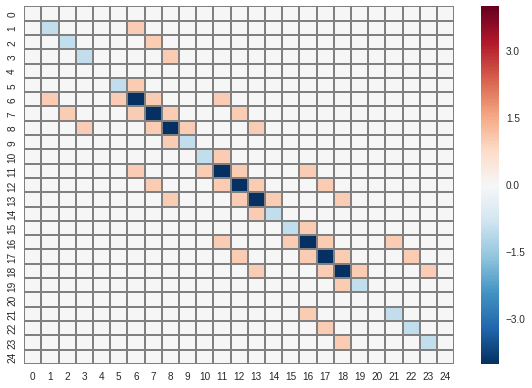

In [179]:
sns.heatmap(make_Gpattern(5,5),linewidths=1,linecolor='grey')
plt.show()

# Modified Nodal Analysis (MNA)
The best and most comprehensive links for MNA on the web:
[MNA](https://www.swarthmore.edu/NatSci/echeeve1/Ref/mna/MNA2.html),
[Algorithm](https://www.swarthmore.edu/NatSci/echeeve1/Ref/mna/MNA3.html),
[Examples](https://www.swarthmore.edu/NatSci/echeeve1/Ref/mna/MNA4.html), and
[Matrix formation rules](https://www.swarthmore.edu/NatSci/echeeve1/Ref/mna/MNAMatrixRules.html).

voltage source at 0,0
ground at r-1,c-1 or n-1

G = mvalues with the diagonal being the positive row sums from Gvalues, and the off diagonals being the 

In [254]:
def getG(n1,n2):
    """holds enough information to reconstruct r1,c1 to r2,c2 information which equates to physical position"""
    return 1
def make_gridpattern(getG,r,c):
    n=r*c
    Gvalues=np.zeros((n,n))
    for i in range(n):
        for j in range(n):

            if i in [x for x in range(0,c-1)]: #top row
                if i==0 and j in [i+1,i+c]:#top left
                    Gvalues[i,j]=getG(i,j)
                elif i==(c-1) and j in [i-1,i+c]:#top right
                    Gvalues[i,j]=getG(i,j)
                elif j in [i-1,i+1,i+c]:
                    Gvalues[i,j]=getG(i,j)
            elif i in [x for x in range((n-1)*n,n*n)]: #bottom row
                if i==(r-1)*c and j in[i+1,i-c]:
                    Gvalues[i,j]=getG(i,j)
                elif i==r*c-1 and j in[i-1,i-c]:
                    Gvalues[i,j]=getG(i,j)
                elif j in [i-1,i+1,i-c]:
                    Gvalues[i,j]=getG(i,j)
            elif i%c==0: #left side
                if j in [i+1,i+c,i-c]:
                    Gvalues[i,j]=getG(i,j)
            elif (i+1)%c==0: # right side
                if j in [i-1,i+c,i-c]:
                    Gvalues[i,j]=getG(i,j)
            else:
                if j in [i+1,i-1,i+c,i-c]:
                    Gvalues[i,j]=getG(i,j)
    return Gvalues
        
def make_G(pattern,gnd):
    n=len(pattern)
    G=-pattern
    for i in range(n):
        for j in range(n):
            if i==j:
                G[i,j]=sum(pattern[i])
    
    return np.delete(np.delete(G,gnd[0],0),gnd[0],1)
    
def make_A(G,Vsrc):
    n=len(G)
    B=np.zeros((n,len(Vsrc)))
    for i in range(n):
            if i in Vsrc:
                B[i,list(Vsrc).index(i)]=1
    D=np.zeros((len(Vsrc),len(Vsrc)))
    BTD=np.append(B.T,D,axis=1)
    return np.append(np.append(G,B,axis=1),BTD,axis=0)
    
def make_z(r,c,Vsrc):
    return np.append(np.zeros((r*c-1,1)),Vsrc[:,1][:,None],axis=0)
    
      

/usr/lib/python3/dist-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


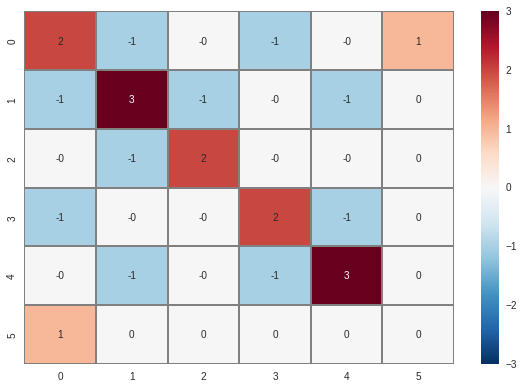

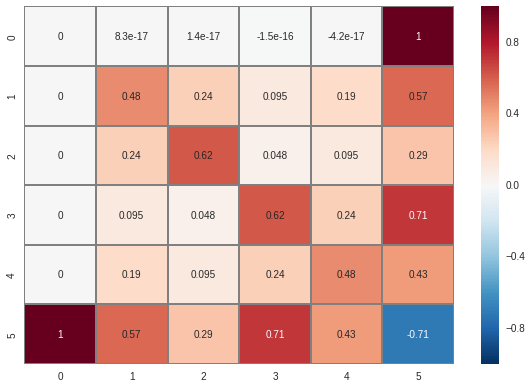

[[ 5.        ]
 [ 2.85714286]
 [ 1.42857143]
 [ 3.57142857]
 [ 2.14285714]
 [-3.57142857]]


In [261]:
r=2
c=3
n=r*c
m=1
G=np.zeros((n,n)) #
Gvalues=np.zeros((n,n))
B=np.zeros((n,m))
C=B.T
D=np.zeros((n,n))
gnd=[n-1]
Vsrc=np.array([[0,5]])
z=make_z(r,c,Vsrc)

A=make_A(make_G(make_gridpattern(getG,r,c),gnd),Vsrc[:,0])
sns.heatmap(A,linewidths=1,linecolor='grey',annot=True)
plt.show()  
sns.heatmap(np.linalg.inv(A),linewidths=1,linecolor='grey',annot=True)
plt.show() 
print(np.matmul(np.linalg.inv(A),z))